In [3]:
import pandas
from time import time

cols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kddData = pandas.read_csv("kddcupFull.csv", header=None, names = cols)

In [5]:
featureNames = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kddData[featureNames].astype(float)

In [6]:
labels = kddData['label'].copy()
labels[labels!='normal.'] = 'attack.'

In [7]:
features.head(1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,215.0,45076.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
labels

0          normal.
1          normal.
2          normal.
3          normal.
4          normal.
            ...   
1048571    normal.
1048572    normal.
1048573    normal.
1048574    normal.
1048575    normal.
Name: label, Length: 1048576, dtype: object

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 59)
kmeans.fit(features)

Clustered in 109.641 seconds


In [10]:
label_names = list(map(
    lambda x: pandas.Series([labels[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i]==x]), 
    range(59)))

for i in range(k):
    print("Cluster {} labels:".format(i))
    print(label_names[i].value_counts())
    print()


Cluster 0 labels:
attack.    227566
normal.     33818
dtype: int64

Cluster 1 labels:
attack.    1
dtype: int64

Cluster 2 labels:
normal.    115
dtype: int64

Cluster 3 labels:
normal.    1
dtype: int64

Cluster 4 labels:
normal.    5
dtype: int64

Cluster 5 labels:
normal.    10
dtype: int64

Cluster 6 labels:
normal.    1
dtype: int64

Cluster 7 labels:
normal.    36
dtype: int64

Cluster 8 labels:
attack.    15
dtype: int64

Cluster 9 labels:
normal.    1
dtype: int64

Cluster 10 labels:
normal.    1
dtype: int64

Cluster 11 labels:
normal.    5086
dtype: int64

Cluster 12 labels:
attack.    1985
normal.     194
dtype: int64

Cluster 13 labels:
normal.    63
dtype: int64

Cluster 14 labels:
normal.    8
attack.    1
dtype: int64

Cluster 15 labels:
normal.    5
dtype: int64

Cluster 16 labels:
normal.    783
dtype: int64

Cluster 17 labels:
normal.    15201
dtype: int64

Cluster 18 labels:
normal.    101
dtype: int64

Cluster 19 labels:
normal.    1
dtype: int64

Cluster 20 labels:

In [11]:
clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])

In [12]:
kddDataTest = pandas.read_csv("corrected.csv", header=None, names = featureNames)
kddDataTest['label'].value_counts()

testData = kddDataTest[num_features].astype(float)
trueLabels = kddDataTest['label'].copy()
true_labels[true_labels!='normal.'] = 'attack.'

In [13]:
pred = kmeans.predict(testData)
new_labels = [] 
for i in pred:                   
    new_labels.append(clusters[i])

Assigned clusters in 0.19 seconds




Accuracy 93.08 %


Confusion Matrix: 

 [[248967   1469]
 [ 20054  40539]]


Classification Scores: 

               precision    recall  f1-score   support

     attack.       0.93      0.99      0.96    250436
     normal.       0.97      0.67      0.79     60593

    accuracy                           0.93    311029
   macro avg       0.95      0.83      0.87    311029
weighted avg       0.93      0.93      0.93    311029



Hamming Loss 0.06919933511023088


Jaccard Score 0.8683696754398648


Matthews corrcoef 0.7684694972388987


Zero-One Loss 0.06919933511023091


<AxesSubplot:>

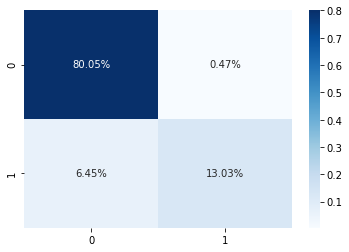

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(true_labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(true_labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(true_labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))

import seaborn as sns
import numpy as np
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')